# "PER Improvement" Prediction Modelling 

In this notebook I will start running baseline models for "PER Improvement" for my model. I will first start with regression, to predict by how much a player can improve next season. I am going to use Linear Regression and Random Forest Regression and run them with pipeline plus gridsearching. Afterwards we will compare the two models and evaluate them.

In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

c:\Users\ivant\anaconda3\envs\capstone\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\ivant\anaconda3\envs\capstone\lib\site-packages\numpy\.libs\libopenblas.noijjg62emaszi6nyurl6jbkm4evbgm7.gfortran-win_amd64.dll
c:\Users\ivant\anaconda3\envs\capstone\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
numerical_df = pd.read_csv("numerical_df.csv")

In [3]:
pd.set_option('display.max_columns', None) 
numerical_df

,Player,Age,G,GS,MP,FG%,3PA,3P%,2PA,2P%,eFG%,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS,team,season,Pos,Ht,Wt,Exp,PER,TS%,3PAr,AST%,STL%,BLK%,TOV%,USG%,OWS,WS,WS/48,BPM,OBPM,VORP,TRB%,Ht_cm,grouped_Pos,Pos type dummy_C,Pos type dummy_F,Pos type dummy_G,Previous PER average,Previous PER Improvement,Previous PER Improvement Average,Previous OBPM Improvement,Previous OBPM average,Previous OBPM Improvement Average,Previous TS% average,Previous PTS average,Previous USG% Improvement,Previous USG% average,Previous 3PAr average,PER Improvement
0,A.C. Green,23.0,79.0,72.0,28.4,0.538,0.1,0.000,7.4,0.543,0.538,3.6,0.780,2.7,7.8,1.1,0.9,1.0,1.3,2.2,10.8,LAL,1987/1988,PF,6-9,220.0,1.0,15.7,0.599,0.009,4.6,1.5,2.0,12.5,14.7,4.3,7.6,0.163,1.0,0.9,1.7,15.3,205.74,F,0.0,1.0,0.0,13.986667,1.2,0.300000,0.5,0.006667,0.206667,0.539867,9.453333,0.0,14.540000,0.054467,-1.2
1,A.C. Green,24.0,82.0,64.0,32.1,0.503,0.0,0.000,7.8,0.505,0.503,4.6,0.773,3.0,8.7,1.1,1.1,0.5,1.5,2.5,11.4,LAL,1988/1989,PF,6-9,220.0,2.0,14.5,0.581,0.003,4.5,1.6,1.0,12.9,14.7,4.5,7.9,0.144,0.3,0.4,1.5,15.3,205.74,F,0.0,1.0,0.0,13.950000,-3.3,0.235714,-1.4,-0.021429,0.185714,0.536929,9.314286,-2.3,14.528571,0.058143,3.3
2,A.C. Green,25.0,82.0,82.0,30.6,0.529,0.2,0.235,9.0,0.536,0.532,4.4,0.786,3.1,9.0,1.3,1.1,0.7,1.5,2.1,13.3,LAL,1989/1990,PF,6-9,220.0,3.0,17.8,0.594,0.022,5.5,1.8,1.2,11.5,17.0,5.8,9.4,0.179,1.6,1.8,2.3,16.4,205.74,F,0.0,1.0,0.0,13.653846,3.1,0.507692,1.5,-0.161538,0.307692,0.532538,9.007692,-0.1,14.338462,0.060923,-3.1
3,A.C. Green,26.0,82.0,82.0,33.0,0.478,0.6,0.283,9.3,0.489,0.486,4.5,0.751,3.2,8.7,1.1,0.8,0.6,1.4,2.5,12.9,LAL,1990/1991,PF,6-9,220.0,4.0,14.7,0.548,0.057,4.6,1.2,1.1,10.7,17.1,4.4,7.7,0.137,-0.6,0.3,1.0,15.1,205.74,F,0.0,1.0,0.0,13.566667,0.9,0.291667,0.2,-0.200000,0.208333,0.531250,8.683333,1.5,14.108333,0.061250,-0.9
4,A.C. Green,27.0,82.0,21.0,26.4,0.476,0.7,0.200,5.9,0.507,0.486,3.7,0.738,2.5,6.3,0.9,0.7,0.3,1.2,1.4,9.1,LAL,1991/1992,PF,6-9,220.0,5.0,13.8,0.556,0.101,4.5,1.4,0.6,12.8,15.6,3.2,6.1,0.135,0.0,0.1,1.1,13.8,205.74,F,0.0,1.0,0.0,13.545455,-2.9,0.236364,-1.6,-0.227273,0.209091,0.529000,8.645455,-1.2,13.972727,0.057636,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11370,Žarko Čabarkapa,23.0,37.0,0.0,12.5,0.482,1.0,0.361,3.6,0.515,0.521,1.7,0.813,0.9,2.7,0.7,0.3,0.1,0.8,1.6,6.2,GSW,2005/2006,PF,6-11,235.0,1.0,16.5,0.578,0.212,9.2,1.1,0.8,13.1,21.7,0.8,1.2,0.124,-0.5,0.1,0.2,11.6,210.82,F,0.0,1.0,0.0,16.500000,0.0,0.000000,0.0,0.100000,0.000000,0.578000,6.200000,0.0,21.700000,0.212000,-6.6
11371,Željko Rebrača,29.0,74.0,4.0,15.9,0.505,0.0,0.000,5.1,0.505,0.505,2.4,0.771,1.1,3.9,0.5,0.4,1.0,1.1,2.6,6.9,DET,2002/2003,C,7-0,257.0,0.0,16.2,0.569,0.000,5.7,1.3,4.4,15.7,21.4,1.4,3.3,0.134,-2.3,-2.9,-0.1,14.5,213.36,C,1.0,0.0,0.0,12.350000,5.5,1.100000,0.8,-2.700000,-0.600000,0.608500,5.250000,5.9,15.750000,0.000000,-2.2
11372,Željko Rebrača,30.0,30.0,12.0,16.3,0.552,0.0,0.000,4.8,0.552,0.552,1.6,0.792,0.9,3.1,0.3,0.2,0.6,1.0,2.6,6.6,DET,2003/2004,C,7-0,257.0,1.0,14.0,0.596,0.000,3.6,0.7,2.6,14.9,19.2,0.7,1.3,0.133,-2.6,-2.8,-0.1,11.2,213.36,C,1.0,0.0,0.0,13.633333,-2.2,0.000000,0.1,-2.766667,-0.366667,0.595333,5.800000,-2.2,17.633333,0.000000,-4.4
11373,Željko Rebrača,31.0,21.0,2.0,10.6,0.407,0.0,0.000,2.6,0.407,0.407,1.3,0.786,0.9,2.3,0.2,0.2,0.4,0.6,2.1,3.1,DET,2004/2005,C,7-0,257.0,2.0,9.6,0.498,0.000,3.0,1.2,3.1,16.4,16.7,0.1,0.5,0.115,-3.9,-5.1,-0.1,12.8,213.36,C,1.0,0.0,0.0,13.725000,-4.4,-1.100000,-2.3,-2.775000,-0.850000,0.595500,6.000000,-2.5,18.025000,0.000000,4.4


In [4]:
# Lets look at out datatypes in our dataframe.
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11375 entries, 0 to 11374
Data columns (total 59 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Player                             11375 non-null  object 
 1   Age                                11375 non-null  float64
 2   G                                  11375 non-null  float64
 3   GS                                 11375 non-null  float64
 4   MP                                 11375 non-null  float64
 5   FG%                                11375 non-null  float64
 6   3PA                                11375 non-null  float64
 7   3P%                                11375 non-null  float64
 8   2PA                                11375 non-null  float64
 9   2P%                                11375 non-null  float64
 10  eFG%                               11375 non-null  float64
 11  FTA                                11375 non-null  flo

For linear regression, I need to make a dataframe with numerical columns only, so I will drop all columns that are objects. Columns like grouped_Pos I have already converted it into dummy columns. Ht I have converted the inches into cms. Then the other object columns like "team", "season" and "player" won't be that important for our modelling so we will drop them for our modelling.

In [5]:
numerical_df = numerical_df.select_dtypes(exclude=['object'])

In [6]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11375 entries, 0 to 11374
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11375 non-null  float64
 1   G                                  11375 non-null  float64
 2   GS                                 11375 non-null  float64
 3   MP                                 11375 non-null  float64
 4   FG%                                11375 non-null  float64
 5   3PA                                11375 non-null  float64
 6   3P%                                11375 non-null  float64
 7   2PA                                11375 non-null  float64
 8   2P%                                11375 non-null  float64
 9   eFG%                               11375 non-null  float64
 10  FTA                                11375 non-null  float64
 11  FT%                                11375 non-null  flo

In [7]:
numerical_df

,Age,G,GS,MP,FG%,3PA,3P%,2PA,2P%,eFG%,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS,Wt,Exp,PER,TS%,3PAr,AST%,STL%,BLK%,TOV%,USG%,OWS,WS,WS/48,BPM,OBPM,VORP,TRB%,Ht_cm,Pos type dummy_C,Pos type dummy_F,Pos type dummy_G,Previous PER average,Previous PER Improvement,Previous PER Improvement Average,Previous OBPM Improvement,Previous OBPM average,Previous OBPM Improvement Average,Previous TS% average,Previous PTS average,Previous USG% Improvement,Previous USG% average,Previous 3PAr average,PER Improvement
0,23.0,79.0,72.0,28.4,0.538,0.1,0.000,7.4,0.543,0.538,3.6,0.780,2.7,7.8,1.1,0.9,1.0,1.3,2.2,10.8,220.0,1.0,15.7,0.599,0.009,4.6,1.5,2.0,12.5,14.7,4.3,7.6,0.163,1.0,0.9,1.7,15.3,205.74,0.0,1.0,0.0,13.986667,1.2,0.300000,0.5,0.006667,0.206667,0.539867,9.453333,0.0,14.540000,0.054467,-1.2
1,24.0,82.0,64.0,32.1,0.503,0.0,0.000,7.8,0.505,0.503,4.6,0.773,3.0,8.7,1.1,1.1,0.5,1.5,2.5,11.4,220.0,2.0,14.5,0.581,0.003,4.5,1.6,1.0,12.9,14.7,4.5,7.9,0.144,0.3,0.4,1.5,15.3,205.74,0.0,1.0,0.0,13.950000,-3.3,0.235714,-1.4,-0.021429,0.185714,0.536929,9.314286,-2.3,14.528571,0.058143,3.3
2,25.0,82.0,82.0,30.6,0.529,0.2,0.235,9.0,0.536,0.532,4.4,0.786,3.1,9.0,1.3,1.1,0.7,1.5,2.1,13.3,220.0,3.0,17.8,0.594,0.022,5.5,1.8,1.2,11.5,17.0,5.8,9.4,0.179,1.6,1.8,2.3,16.4,205.74,0.0,1.0,0.0,13.653846,3.1,0.507692,1.5,-0.161538,0.307692,0.532538,9.007692,-0.1,14.338462,0.060923,-3.1
3,26.0,82.0,82.0,33.0,0.478,0.6,0.283,9.3,0.489,0.486,4.5,0.751,3.2,8.7,1.1,0.8,0.6,1.4,2.5,12.9,220.0,4.0,14.7,0.548,0.057,4.6,1.2,1.1,10.7,17.1,4.4,7.7,0.137,-0.6,0.3,1.0,15.1,205.74,0.0,1.0,0.0,13.566667,0.9,0.291667,0.2,-0.200000,0.208333,0.531250,8.683333,1.5,14.108333,0.061250,-0.9
4,27.0,82.0,21.0,26.4,0.476,0.7,0.200,5.9,0.507,0.486,3.7,0.738,2.5,6.3,0.9,0.7,0.3,1.2,1.4,9.1,220.0,5.0,13.8,0.556,0.101,4.5,1.4,0.6,12.8,15.6,3.2,6.1,0.135,0.0,0.1,1.1,13.8,205.74,0.0,1.0,0.0,13.545455,-2.9,0.236364,-1.6,-0.227273,0.209091,0.529000,8.645455,-1.2,13.972727,0.057636,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11370,23.0,37.0,0.0,12.5,0.482,1.0,0.361,3.6,0.515,0.521,1.7,0.813,0.9,2.7,0.7,0.3,0.1,0.8,1.6,6.2,235.0,1.0,16.5,0.578,0.212,9.2,1.1,0.8,13.1,21.7,0.8,1.2,0.124,-0.5,0.1,0.2,11.6,210.82,0.0,1.0,0.0,16.500000,0.0,0.000000,0.0,0.100000,0.000000,0.578000,6.200000,0.0,21.700000,0.212000,-6.6
11371,29.0,74.0,4.0,15.9,0.505,0.0,0.000,5.1,0.505,0.505,2.4,0.771,1.1,3.9,0.5,0.4,1.0,1.1,2.6,6.9,257.0,0.0,16.2,0.569,0.000,5.7,1.3,4.4,15.7,21.4,1.4,3.3,0.134,-2.3,-2.9,-0.1,14.5,213.36,1.0,0.0,0.0,12.350000,5.5,1.100000,0.8,-2.700000,-0.600000,0.608500,5.250000,5.9,15.750000,0.000000,-2.2
11372,30.0,30.0,12.0,16.3,0.552,0.0,0.000,4.8,0.552,0.552,1.6,0.792,0.9,3.1,0.3,0.2,0.6,1.0,2.6,6.6,257.0,1.0,14.0,0.596,0.000,3.6,0.7,2.6,14.9,19.2,0.7,1.3,0.133,-2.6,-2.8,-0.1,11.2,213.36,1.0,0.0,0.0,13.633333,-2.2,0.000000,0.1,-2.766667,-0.366667,0.595333,5.800000,-2.2,17.633333,0.000000,-4.4
11373,31.0,21.0,2.0,10.6,0.407,0.0,0.000,2.6,0.407,0.407,1.3,0.786,0.9,2.3,0.2,0.2,0.4,0.6,2.1,3.1,257.0,2.0,9.6,0.498,0.000,3.0,1.2,3.1,16.4,16.7,0.1,0.5,0.115,-3.9,-5.1,-0.1,12.8,213.36,1.0,0.0,0.0,13.725000,-4.4,-1.100000,-2.3,-2.775000,-0.850000,0.595500,6.000000,-2.5,18.025000,0.000000,4.4


We now have 48 columns, with all being numerical columns, ready for modellings.

# Test Split

In [8]:
y = numerical_df["PER Improvement"] # Setting our "PER Improvement" as our target variable
X = numerical_df.drop("PER Improvement", axis = 1) #Setting all other features as our data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 100) # I am splitting the dataset so that we have 90% as trainning set, because we only have 7881 rows so we don't have that many data.

# Linear Regression Model

I am going to first start with a Linear Regression Model. Using a pipeline, I am setting our Scaler as StandardScaler for our model. I am then comparing our regressor parameters: "Ridge" and "Lasso" using gridseach. We will be searching if Ridge or Lasso will perform better for our model, and their best alpha value ranging from 0.1 - 1000.

In [9]:
from tempfile import mkdtemp
cachedir = mkdtemp()
# I am using the memory parameter here to make the runtime faster
from tempfile import mkdtemp
# Ignore futurewarnings
import warnings
warnings.filterwarnings('ignore')

cachedir = mkdtemp()

estimators = [('normalise', StandardScaler()),   # Setting StandardScaler
              #('reduce_dim', PCA(n_components = 45)),
              ('regressor', Ridge())] # Naming it regressor and Ridge for now, but we are comparing Ridge and Lasso in gridsearch
pipe = Pipeline(estimators, memory = cachedir) 



params = [{'regressor': [Ridge()],
     'regressor__alpha': [0.1, 0.5, 0.7, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 40, 50, 60, 70, 100, 150, 200, 500, 1000]},  # Setting our alpha range from 0.1 to 1000
    {'regressor': [Lasso()],
     'regressor__alpha': [0.1, 0.5, 0.7, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,20, 40, 50, 60, 70, 100, 150, 200, 500, 1000]}
]

grid_search = GridSearchCV(pipe, param_grid=params, verbose= 5, refit=True) # Initiating the gridsearchCV, setting refit = true to refit the entire training set to get the test score, cv is 5 by default
grid_search.fit(X_train, y_train) # Fitting my gridsearchCV to my X_train and y_train data.

Fitting 5 folds for each of 46 candidates, totalling 230 fits
[CV 1/5] END ........regressor=Ridge(), regressor__alpha=0.1; total time=   0.1s


[CV 2/5] END ........regressor=Ridge(), regressor__alpha=0.1; total time=   0.0s
[CV 3/5] END ........regressor=Ridge(), regressor__alpha=0.1; total time=   0.0s
[CV 4/5] END ........regressor=Ridge(), regressor__alpha=0.1; total time=   0.0s
[CV 5/5] END ........regressor=Ridge(), regressor__alpha=0.1; total time=   0.0s
[CV 1/5] END ........regressor=Ridge(), regressor__alpha=0.5; total time=   0.0s
[CV 2/5] END ........regressor=Ridge(), regressor__alpha=0.5; total time=   0.0s
[CV 3/5] END ........regressor=Ridge(), regressor__alpha=0.5; total time=   0.0s
[CV 4/5] END ........regressor=Ridge(), regressor__alpha=0.5; total time=   0.0s
[CV 5/5] END ........regressor=Ridge(), regressor__alpha=0.5; total time=   0.0s
[CV 1/5] END ........regressor=Ridge(), regressor__alpha=0.7; total time=   0.0s
[CV 2/5] END ........regressor=Ridge(), regressor__alpha=0.7; total time=   0.0s
[CV 3/5] END ........regressor=Ridge(), regressor__alpha=0.7; total time=   0.0s
[CV 4/5] END ........regress

GridSearchCV(estimator=Pipeline(memory='C:\\Users\\ivant\\AppData\\Local\\Temp\\tmprrmwmpr1',
                                steps=[('normalise', StandardScaler()),
                                       ('regressor', Ridge())]),
             param_grid=[{'regressor': [Ridge(alpha=6)],
                          'regressor__alpha': [0.1, 0.5, 0.7, 1, 2, 3, 4, 5, 6,
                                               7, 8, 9, 10, 20, 40, 50, 60, 70,
                                               100, 150, 200, 500, 1000]},
                         {'regressor': [Lasso()],
                          'regressor__alpha': [0.1, 0.5, 0.7, 1, 2, 3, 4, 5, 6,
                                               7, 8, 9, 10, 20, 40, 50, 60, 70,
                                               100, 150, 200, 500, 1000]}],
             verbose=5)

In [10]:
from sklearn.metrics import accuracy_score
best_params = grid_search.best_params_  # Getting the best parameters from our grid search
print(f"Best parameters: {best_params}") 

LR_best_pipe = grid_search.best_estimator_


Best parameters: {'regressor': Ridge(alpha=6), 'regressor__alpha': 6}


From our gridsearch, we find that "Ridge" is our best regressor for our Linear Regressor model, with alpha strength at "3" being the best strength. 

The reason of why Ridge is better is firstly because NBA data often contains multicollinearity (points scored, assists, field goals etc.) are highly correlated with with each other. Ridge regression is better with handling multicollinearity than Lasso. Secondly, most of my feature coefficient contributions might be small, and Ridge and include all the features by shrinking their coefficient, whereas Lasso will tend to eliminate for feature selection.

In [11]:
best_validation_performance = grid_search.best_score_  # Getting the best validation set score from our grid search
print(f"Best validation performance: {best_validation_performance}")

y_test_pred = LR_best_pipe.predict(X_test)  # make predictions on training set 

r2_test = r2_score(y_test, y_test_pred)  # get r2 
print(f'R squared: {round(r2_test, 3)}')

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))  # get rmse 
print(f'RMSE: {round(rmse_test, 2)}')

mae_test = mean_absolute_error(y_test, y_test_pred)  # get mae
print(f'MAE: {round(mae_test, 2)}')

Best validation performance: 0.32740489548650215
R squared: 0.364
RMSE: 2.41
MAE: 1.82


From our results, we have a trained R squared of 0.2527, and a test R squared of 0.24. This shows that our scores are neither overfitting or underfitting and rather they fit quite well. However, the accuracy of our model is quite low, with a test score of only 0.24. 

We have a lower MAE (1.93) than our RMSE (2.19). From our EDA box plot, we learnt that there are quite a lot of outliers for our target variable "PER Improvement". RMSE is senstive to predictions further away so its more sensitive to our model which contains a lot of outliers.

I decided to also investigate the features with top coefficients impacting our target variable in our Linear Regression.

In [12]:
best_model = LR_best_pipe["regressor"]
feature_names = X_train.columns

In [13]:
coef_df = pd.DataFrame({  # Making a dataframe - coef_df, which includes a column of all the feature names, and a column of the features' corresponding coefficients
    "coefficient": best_model.coef_, # The coefficient values
    "Columns": X_train.columns # The feature names
})

coef_df20 = coef_df.reindex(coef_df.coefficient.abs().sort_values(ascending=False).index).head(20) # Rearranging the dataframe with .reindex, to get the Top 20 features with coefficients with .head(20)

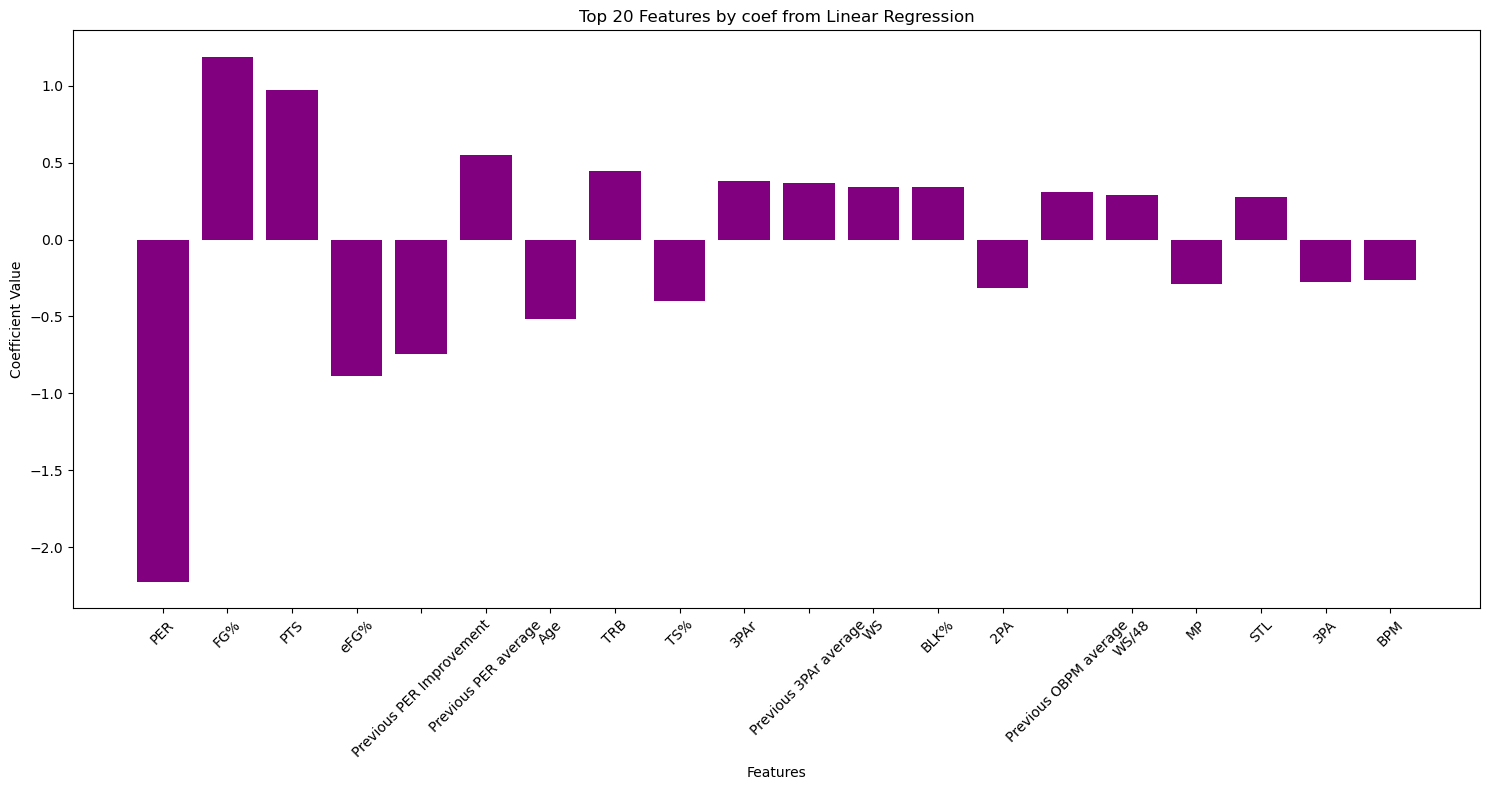

In [14]:
plt.figure(figsize = (15,8))
plt.bar(coef_df20["Columns"], coef_df20["coefficient"], color = "purple")
plt.ylabel('Coefficient Value')
plt.xlabel('Features') 
plt.xticks(rotation=45)
plt.title('Top 20 Features by coef from Linear Regression')
plt.tight_layout()
plt.show()

In [15]:
coef_df20

,coefficient,Columns
22,-2.225261,PER
4,1.189883,FG%
19,0.971750,PTS
9,-0.887992,eFG%
42,-0.746060,Previous PER Improvement
41,0.548512,Previous PER average
0,-0.517080,Age
13,0.443417,TRB
23,-0.400400,TS%
24,0.381813,3PAr


Starting from the top, we have "PER" as the most impactful feature to our target, with a coefficient of -1.77. From our EDA findings we investigated how star players with already high "PER" are likely to have a smaller room for improvement, our Linear Regression Model supports our hypothesis. eFG% has the second highest negative coefficient, -1.52. "eFG%" is how accurate players make their shots, so this also shows a player with a more developed skillset will obviously have a lesser room of improvement. These negative coefficients also suggest that not only a player will less likely to improve when they are good, they are also more likely to decline in their "PER". Perhaps every player has a peak for their potential, and as they reach that level they will eventually decline, caused by age. "Age" is our 6th most feature, and our third highest in negative coefficient, -0.73. This further confirms our hypothesis from our EDA that players are less likely to improve as they get older, as they will experience a decline in their athleticism. "Previous PER Improvement" has a -0.59 coefficient for "PER Improvement", this suggests that a player who has a greater improvement last year, is likely to decrease in improvement the next year, or even a small drop in PER in result of big improvement jump last year.

Moving to our highest positive coefficients, "FG%" and "FG" have the highest postive coefficients, with 1.63 and 1.33. A player with more shooting (field goals) attempts during the season can lead to greater player improvement and confidence, this can explain why "FG" having one of the highest positive coefficients, as "FG" is the number of field goals. "3PAr" is the "Three-Point Attempt Rate", which is the percentage of a player's three point field goal attempts out of their total field goal attempts. Its a common knowledge that 3 pointers are becoming more and more impactful in NBA games nowadays. For "3PAr" being one of the highest positive coefficient, meaning that as players are attempting more 3 pointers they are likely to improve more, showing how important it is for a player to develop their 3 pointer skills in todays' NBA. 

# RandomForest Regression

Next I decided to run a Randomforest regression model on our dataset. I will start with pipe line combined with grid search to tune our hyperparamers.

In [16]:
# # Starting our grid search with some basic hyperparameters, and comparing two criterion "mse" and "mae"

# warnings.filterwarnings('ignore')
# cachedir = mkdtemp()

# estimators = [('normalise', StandardScaler()),   
#              # ('reduce_dim', PCA(n_components = 20)),
#               ('rf', RandomForestRegressor(random_state=1))]
# pipe = Pipeline(estimators, memory = cachedir) 


# param_grid = {
#     'rf__n_estimators': [40, 50],  # Number of trees in the forest
#     'rf__max_depth': [9, 10],  # Maximum depth of the tree
#     'rf__min_samples_leaf': [3, 4],  # Minimum number of samples required at each leaf node
#     'rf__criterion': ['mse', 'mae'],  # Function to measure the quality of a split
#     #'rf__max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
# }
# grid_search = GridSearchCV(pipe, param_grid, cv=5, verbose= 5, refit=True)
# grid_search.fit(X_train, y_train)

In [17]:
# best_params = grid_search.best_params_  # Getting the best parameters from our grid search
# print(f"Best parameters: {best_params}") 

# RF_best_pipe = grid_search.best_estimator_

In [18]:
# best_validation_performance = grid_search.best_score_  # Getting the best validation set score from our grid search
# print(f"Best validation performance: {best_validation_performance}")

# y_test_pred = RF_best_pipe.predict(X_test)  # make predictions on training set 

# r2_test = r2_score(y_test, y_test_pred)  # get r2 
# print(f'R squared: {round(r2_test, 2)}')

# rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))  # get rmse 
# print(f'RMSE: {round(rmse_train, 2)}')

# mae_test = mean_absolute_error(y_test, y_test_pred)  # get mae
# print(f'MAE: {round(mae_test, 2)}')

From my first Random Forest grid search I got a training score of 0.22 and a test score of 0.21, with best criterion being "MSE". (I know the results above say otherwise now, it is because I accidentally ran the gridsearch again with everything done, so its now giving me a different result with "MAE" being better. But for now I will go with my previous first results)

I discovered that "MSE" is better than "MAE" for RandomForestRegressor for our model, I want to further explore my other hyperparameters to test the limit of our model because we can see higher values for min sample leaf and number of estimators might do even better for our model, and we will take away "MAE" for faster computational speed and we already know "MSE" is better.

In [19]:
# Second grid search
warnings.filterwarnings('ignore')
cachedir = mkdtemp()

estimators = [('normalise', StandardScaler()),   
             # ('reduce_dim', PCA(n_components = 20)),
              ('rf', RandomForestRegressor(random_state=1))]
pipe = Pipeline(estimators, memory = cachedir) 


param_grid = {
    'rf__n_estimators': [220, 230, 240, 250],  # Number of trees in the forest
    'rf__max_depth': [15, 16, 17, 18, 19],  # Maximum depth of the tree
    'rf__min_samples_leaf': [8, 9, 10],  # Minimum number of samples required at each leaf node
    #'rf__criterion': ['mse', 'mae'],  # Function to measure the quality of a split
    #'rf__max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}
grid_search = GridSearchCV(pipe, param_grid, cv=5, verbose= 5, refit=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END rf__max_depth=15, rf__min_samples_leaf=8, rf__n_estimators=220; total time=  48.6s
[CV 2/5] END rf__max_depth=15, rf__min_samples_leaf=8, rf__n_estimators=220; total time=  50.7s
[CV 3/5] END rf__max_depth=15, rf__min_samples_leaf=8, rf__n_estimators=220; total time=  52.7s
[CV 4/5] END rf__max_depth=15, rf__min_samples_leaf=8, rf__n_estimators=220; total time=  55.2s
[CV 5/5] END rf__max_depth=15, rf__min_samples_leaf=8, rf__n_estimators=220; total time=  53.5s
[CV 1/5] END rf__max_depth=15, rf__min_samples_leaf=8, rf__n_estimators=230; total time=  54.6s
[CV 2/5] END rf__max_depth=15, rf__min_samples_leaf=8, rf__n_estimators=230; total time=  55.9s
[CV 3/5] END rf__max_depth=15, rf__min_samples_leaf=8, rf__n_estimators=230; total time=  57.2s
[CV 4/5] END rf__max_depth=15, rf__min_samples_leaf=8, rf__n_estimators=230; total time=  54.3s
[CV 5/5] END rf__max_depth=15, rf__min_samples_leaf=8, rf__n_estimators=23

GridSearchCV(cv=5,
             estimator=Pipeline(memory='C:\\Users\\ivant\\AppData\\Local\\Temp\\tmprq8w5l41',
                                steps=[('normalise', StandardScaler()),
                                       ('rf',
                                        RandomForestRegressor(random_state=1))]),
             param_grid={'rf__max_depth': [15, 16, 17, 18, 19],
                         'rf__min_samples_leaf': [8, 9, 10],
                         'rf__n_estimators': [220, 230, 240, 250]},
             verbose=5)

In [22]:
best_params = grid_search.best_params_  # Getting the best parameters from our grid search
print(f"Best parameters: {best_params}") 

RF_best_pipe = grid_search.best_estimator_

Best parameters: {'rf__max_depth': 17, 'rf__min_samples_leaf': 9, 'rf__n_estimators': 240}


In [24]:
best_validation_performance = grid_search.best_score_  # Getting the best validation set score from our grid search
print(f"Best validation performance: {best_validation_performance}")

y_test_pred = RF_best_pipe.predict(X_test)  # make predictions on training set 

r2_test = r2_score(y_test, y_test_pred)  # get r2 
print(f'R squared: {round(r2_test, 3)}')

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))  # get rmse 
print(f'RMSE: {round(rmse_test, 2)}')

mae_test = mean_absolute_error(y_test, y_test_pred)  # get mae
print(f'MAE: {round(mae_test, 2)}')

Best validation performance: 0.3384848128738863
R squared: 0.377
RMSE: 2.39
MAE: 1.76


My randomforest regression has a training R^2 of 0.23 and a test R^2 of 0.22. A good balance between train and test again but very low accuracy scores. RMSE is much higher than MAE, with 2.52 and 1.94 respectively. 

# Model Evaluations and Comparison

| Model | Hyper Parameters                                                    | Train R^2 | Test R^2 | RMSE | MAE  | Notes                                                                                                                                |
|-------|---------------------------------------------------------------------|-----------|----------|------|------|--------------------------------------------------------------------------------------------------------------------------------------|
| LR    | Regressor: Ridge, Alpha: 3                                           | 0.25      | 0.24     | 2.48 | 1.93 | Low accuracy on both train and test score, good fit of training and test scores Higher RMSE than MAE due to large amount of outliers |
| RF    | Max depth: 9, Min Sample Leaves: 13, N_Estimators: 110, Criterion: MSE | 0.23      | 0.22     | 2.52 | 1.94 | Low accuracy on both train and test score, good fit of training and test scores Higher RMSE than MAE due to large amount of outliers |


My Linear Regression and RandomForest Regression give very similar results. Both giving a very good balance between training and testing score perfomance, no over/underfitting. However, both models failed to give a good accuracy score, with Linear Regression scoring a test R^2 of 0.24 and RandomForest Regression scoring 0.22. My Linear Regression model is slightly better than Randomforest regression by 0.02 test score. Both achieving a low accuracy score suggests that this predictive task is challenging, and / or I need to still find better models for my data set. 

Both models have a higher RMSE than MAE, due to the large amount of outliers in the model at this stage. It can also indicate both models have large errors which is caused by the larger values. This might be caused by most data being smaller values, narrowing the model's prediction results. I might need to implement weighting and upscaling for my data.